<a href="https://colab.research.google.com/github/BrianM50/MAT-421/blob/main/Module_H_Section_22_4_22_5%2C_22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Section 22.4(Numerical Error and Instability)**

Accuracy and stability are two main concerns with integration schemes for ODEs.

 A scheme's ability to get close to the exact solution as a function of the step size h is known as accuracy.

 A integration scheme ability to keep the error from growing as it integrates forward in time is known as the stability. The issues with stability can be displayed when solving the pendulum equation using the Euler Explicit, Euler Implicit, and the Trapezoidal Formulas.

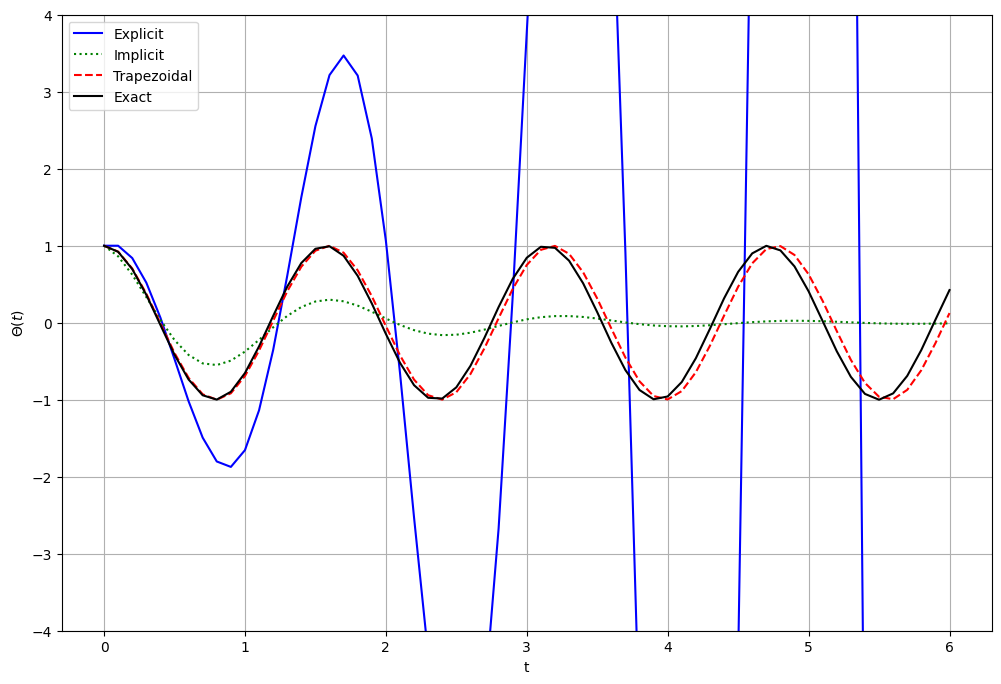

In [1]:
#Solve the pendulum equation over the time interval [0,6] in increments of 0.1 and for an intial solution of S(0)=[1;0] Using the Euler Explicit, Euler Implicit, and Trapezoidal Formulas.
#Use the model parameters sqrt(g/l)=4.

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 6.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], [w**2*h/2,1]])), np.array([[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-4, 4])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.grid()
plt.show()

**Section 22.5(Predictor-Corrector Methods)**

A method of solving initial value problems that improves the approximation accuracy of non-predictor-corector methods is known as the predictor-corrector. It does this by querying the F function several times at different locations (predictions), and then using a weighted average of the results (corrections) to update the state.

This method uses two formulas the predictor and corrector. The predictor is an explicit formula that estimates the solution at t(j+1). We can then use the corrector to improve the accuracy using the solution obtained S(t(j+1)).

A method that has a predictor step is the midpoint method which is:

S(t(j)+h/2) = S(t(j)) + (h/2)F(t(j),S(t(j))

This is the predictor of the solution between t(j) and t(j+1). Then it computesw the corrector step.

S(t(j+1)) = S(t(j)) + hF(t(j)+h/2,S(t(j)+h/2))

**Section 22.6(Python ODE Solvers)**

There are many built-in functions for solving initial value problems. One of the most common ones used is the scipy.integrate.solve_ivp function.

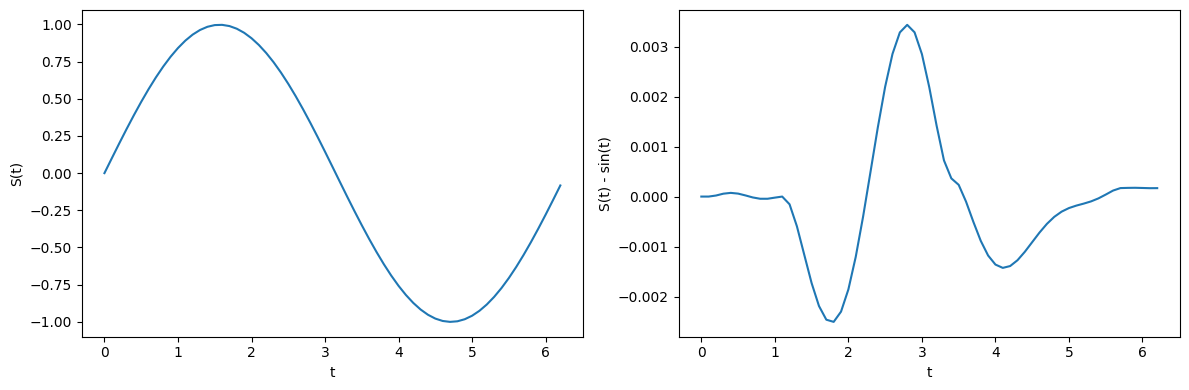

In [ ]:
#Solve the ODE dS(t)/dt = cos(t) for an initial value S(0)=0, using solve.ivp to approximate the solution over the interval[0,2pi].

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, 2*np.pi, 0.1)
sol = solve_ivp(F, [0, 2*np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()